In [1]:
import sys
sys.path.append('../../MembraneQuant')
from membranequant import *
import seaborn as sns
%matplotlib notebook

In [2]:
path = '/Users/blandt/Desktop/Analysis/Experiments/e2107__gcn4'
direcs = direcslist(path, 1)

imgs = [load_image(d + '/af_corrected.tif') for d in direcs]
rois = [np.loadtxt(d + '/ROI_fitted.txt') for d in direcs]
straight = [straighten(i, r, 50) for i, r in zip(imgs, rois)]

In [6]:
profiles = [bounded_mean_2d(s, [0.9, 0.1]) for s in straight]
profiles_norm = [p / np.mean(p[45:]) for p in profiles]

In [37]:
df = pd.read_csv('df.csv')
df

,Unnamed: 0,Frame,Path,Folder,Name,Line,Condition,Dosage,Mems,Cyts,Ratio
0,0,0,/Users/blandt/Desktop/Analysis/Experiments/e21...,"210428_nwg240_tom4,16,50",05,nwg240,C56S,6278.682672,3548.089775,6164.343045,0.575583
1,1,1,/Users/blandt/Desktop/Analysis/Experiments/e21...,"210428_nwg240_tom4,16,50",06,nwg240,C56S,5622.849719,2359.466828,5668.229176,0.416262
2,2,2,/Users/blandt/Desktop/Analysis/Experiments/e21...,"210428_nwg240_tom4,16,50",07,nwg240,C56S,6702.391560,3050.594115,6920.080709,0.440832
3,3,3,/Users/blandt/Desktop/Analysis/Experiments/e21...,"210428_nwg240_tom4,16,50",08,nwg240,C56S,5459.573881,2463.777125,5345.216496,0.460931
4,4,4,/Users/blandt/Desktop/Analysis/Experiments/e21...,"210428_nwg240_tom4,16,50",09,nwg240,C56S,5744.892702,3225.563050,5704.057870,0.565486
5,5,5,/Users/blandt/Desktop/Analysis/Experiments/e21...,"210428_nwg338_tom4,15,60",00,nwg338,L109R,6231.061580,4940.195077,5794.395544,0.852582
6,6,6,/Users/blandt/Desktop/Analysis/Experiments/e21...,"210428_nwg338_tom4,15,60",01,nwg338,L109R,5719.991106,4638.825099,5339.667289,0.868748
7,7,7,/Users/blandt/Desktop/Analysis/Experiments/e21...,"210428_nwg338_tom4,15,60",02,nwg338,L109R,6685.399468,5090.058762,6155.618089,0.826896
8,8,8,/Users/blandt/Desktop/Analysis/Experiments/e21...,"210428_nwg338_tom4,15,60",03,nwg338,L109R,6657.147284,5227.684202,6102.640975,0.856627
9,9,9,/Users/blandt/Desktop/Analysis/Experiments/e21...,"210428_nwg338_tom4,15,60",04,nwg338,L109R,5955.832813,5338.910327,5323.446227,1.002905


In [62]:
def func(condition):
    direcs = df[df.Condition == condition].Path
    imgs = [load_image(d + '/af_corrected.tif') for d in direcs]
    rois = [np.loadtxt(d + '/ROI_fitted.txt') for d in direcs]
    straight = [straighten(i, r, 50) for i, r in zip(imgs, rois)]
    profiles = np.array([bounded_mean_2d(s, [0.9, 0.1]) for s in straight])
    profiles_norm = np.array([p / np.mean(p[45:]) for p in profiles])
    profiles_itp = interp_2d_array(profiles, 500, ax=0)
    profiles_norm_itp = interp_2d_array(profiles_norm, 500, ax=0)
    return profiles_itp, profiles_norm_itp

In [116]:
def func2(ax, condition, c, label=None):
    profs, profs_norm = func(condition)
    p_mean, p_std = np.mean(profs_norm, axis=0), np.std(profs_norm, axis=0)
#     ax.plot(np.linspace(0, 50, 500), profs_norm.T, c=c)
    ax.plot(np.linspace(0, 50, 500), p_mean, c=c, label=label)
    ax.fill_between(np.linspace(0, 50, 500), p_mean - p_std, p_mean + p_std, color=c, alpha=0.2)

<IPython.core.display.Javascript object>


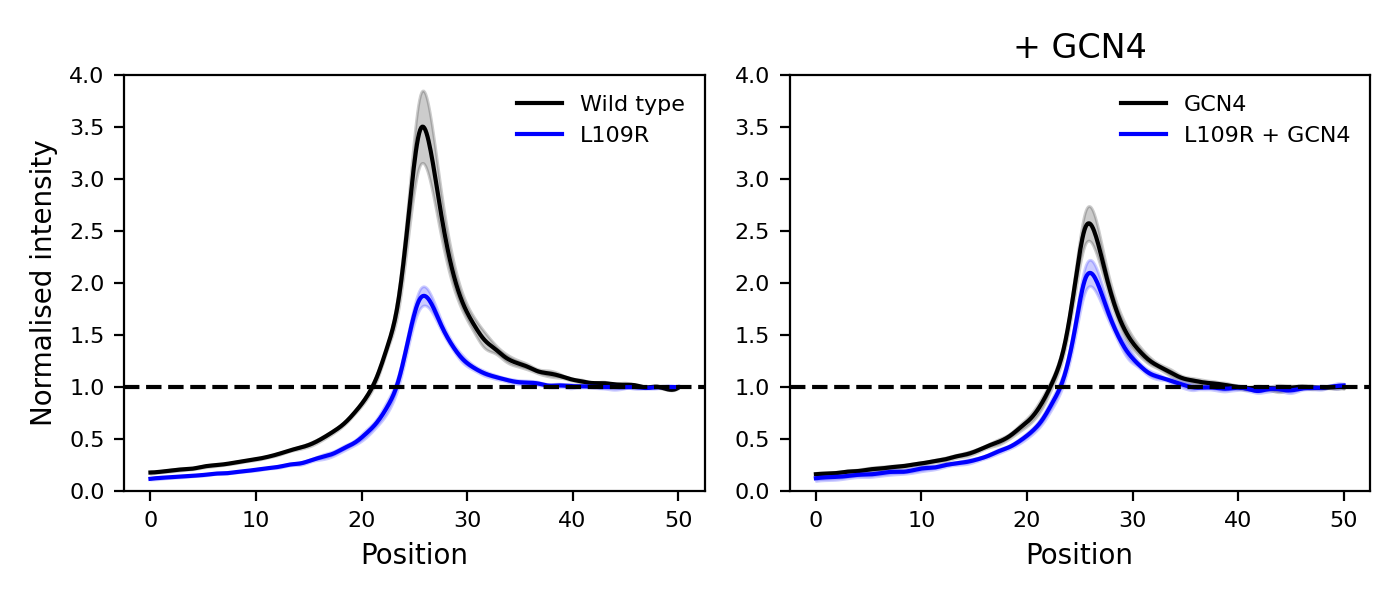

In [125]:
fig, (ax1, ax2) = plt.subplots(1, 2)

func2(ax1, 'Wild type', 'k', 'Wild type')
func2(ax1, 'L109R', 'b', 'L109R')
ax1.axhline(1, c='k', linestyle='--')
ax1.set_ylim(0, 4)
ax1.set_xlabel('Position')
ax1.set_ylabel('Normalised intensity')
ax1.tick_params(axis='both', labelsize=8)
ax1.legend(frameon=False, fontsize=8)

func2(ax2, 'GCN4', 'k', 'GCN4')
func2(ax2, 'L109R_GCN4', 'b', 'L109R + GCN4')
ax2.axhline(1, c='k', linestyle='--')
ax2.set_ylim(0, 4)
ax2.set_xlabel('Position')
# ax2.set_ylabel('Normalised intensity')
ax2.tick_params(axis='both', labelsize=8)
ax2.set_title('+ GCN4')
ax2.legend(frameon=False, fontsize=8)

fig.set_size_inches(7, 3)
fig.tight_layout()